# Recurrent Neural Network (RNN)

## 모델 구조

- **입력 시퀀스**: 시간에 따른 순차 데이터
  - 예: 문장의 단어들, 시계열 데이터

- **순환 레이어**:
  - **은닉 상태** (hidden state): 이전 시점의 정보를 저장
  - **가중치**:
    - `W_xh`: 입력에서 은닉 상태로의 가중치
    - `W_hh`: 이전 은닉 상태에서 현재 은닉 상태로의 가중치
    - `W_hy`: 은닉 상태에서 출력으로의 가중치

- **활성화 함수**:
  - **tanh**: 은닉 상태 계산에 사용
  - 값을 -1과 1 사이로 정규화

---

### RNN 작동 원리

RNN은 순차 데이터를 처리하기 위해 이전 정보를 기억하는 메모리 메커니즘을 가집니다.

**핵심 포인트**
1. 시퀀스 처리
   - 각 시점의 입력을 순차적으로 처리
   - 이전 시점의 정보를 현재 계산에 활용

2. 은닉 상태 (Hidden State)
   - 네트워크의 "메모리" 역할
   - 이전 입력들의 정보를 압축하여 저장
   - 수식: h_t = tanh(W_xh * x_t + W_hh * h_(t-1))

3. 출력 생성
   - 각 시점에서 은닉 상태를 바탕으로 출력 생성
   - 수식: y_t = W_hy * h_t

### 응용 분야
- 자연어 처리 (텍스트 생성, 번역)
- 시계열 예측
- 음성 인식
- 악보 생성

### 한계점
- 긴 시퀀스에서 초기 정보가 손실되는 장기 의존성 문제
- 기울기 소실/폭발 문제
  - 이를 해결하기 위해 LSTM, GRU 등의 발전된 구조가 제안됨

# 시계열 데이터 예시
- 24개의 시간 단위로 다음 1시간을 예측

첫 24시간의 데이터:
                    Timestamp  Temperature
0  2024-01-01 00:00:00.000000         25.1
1  2024-01-01 01:00:05.006954         25.6
2  2024-01-01 02:00:10.013908         26.3
3  2024-01-01 03:00:15.020862         27.2
4  2024-01-01 04:00:20.027816         27.2
5  2024-01-01 05:00:25.034771         27.8
6  2024-01-01 06:00:30.041725         28.6
7  2024-01-01 07:00:35.048679         27.9
8  2024-01-01 08:00:40.055633         28.5
9  2024-01-01 09:00:45.062587         26.8
10 2024-01-01 10:00:50.069541         26.5
11 2024-01-01 11:00:55.076495         26.5
12 2024-01-01 12:01:00.083449         25.2
13 2024-01-01 13:01:05.090403         25.0
14 2024-01-01 14:01:10.097357         23.8
15 2024-01-01 15:01:15.104312         23.1
16 2024-01-01 16:01:20.111266         22.4
17 2024-01-01 17:01:25.118220         22.7
18 2024-01-01 18:01:30.125174         23.0
19 2024-01-01 19:01:35.132128         23.0
20 2024-01-01 20:01:40.139082         23.9
21 2024-01-01 21:01:45.146036         23.

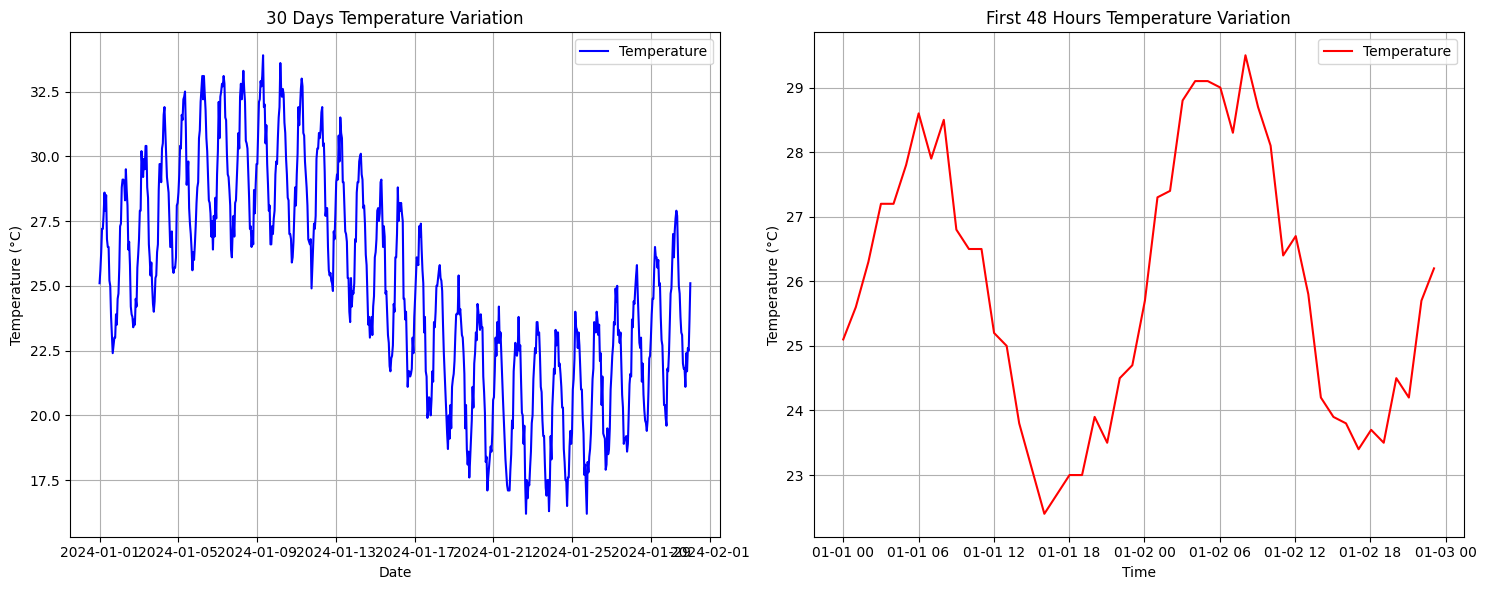


일별 통계:
           Temperature            
                  mean   min   max
Timestamp                         
2024-01-01        25.4  22.4  28.6
2024-01-02        26.4  23.4  29.5
2024-01-03        27.3  24.0  30.4
2024-01-04        28.4  25.5  31.9
2024-01-05        29.0  25.6  32.5


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# 시작 날짜 설정
start_date = datetime(2024, 1, 1)  # 2024년 1월 1일부터 시작

# 30일간 시간별 데이터 생성 (30일 * 24시간 = 720개 데이터)
hours = np.linspace(0, 30*24, 720)  # 30일을 시간 단위로 나눔
timestamps = [start_date + timedelta(hours=float(h)) for h in hours]

# 시간별 온도 변화 시뮬레이션
hourly_temp = (
    25 +                                    # 기준 온도 (25도)
    5 * np.sin(2*np.pi*hours/(24*30)) +    # 월간 변동 (30일 주기)
    3 * np.sin(2*np.pi*hours/24) +         # 일간 변동 (24시간 주기)
    np.random.normal(0, 0.5, len(hours))    # 랜덤 변동
)

# 데이터프레임 생성
df = pd.DataFrame({
    'Timestamp': timestamps,
    'Temperature': hourly_temp
})

# 온도를 소수점 첫째자리까지 반올림
df['Temperature'] = df['Temperature'].round(1)

# 처음 24시간 데이터 출력
print("첫 24시간의 데이터:")
print(df.head(24))

# 기본 통계량 출력
print("\n기본 통계량:")
print(df['Temperature'].describe().round(1))

# 시각화
plt.figure(figsize=(15, 6))

# 전체 30일 데이터 플롯
plt.subplot(1, 2, 1)
plt.plot(df['Timestamp'], df['Temperature'], 'b-', label='Temperature')
plt.title('30 Days Temperature Variation')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend()

# 첫 48시간 데이터 상세 플롯
plt.subplot(1, 2, 2)
plt.plot(df['Timestamp'][:48], df['Temperature'][:48], 'r-', label='Temperature')
plt.title('First 48 Hours Temperature Variation')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# 일별 평균, 최대, 최소 온도
daily_stats = df.set_index('Timestamp').resample('D').agg({
    'Temperature': ['mean', 'min', 'max']
}).round(1)

print("\n일별 통계:")
print(daily_stats.head())

In [2]:
def create_sequences(data, seq_length):
    """
    시계열 데이터를 RNN 입력용 시퀀스로 변환
    
    Parameters:
        data: 시계열 데이터 (온도 값)
        seq_length: 입력 시퀀스 길이 (몇 시간의 데이터로 다음을 예측할지)
    
    Returns:
        X: 입력 시퀀스 배열 (samples, sequence_length)
        y: 타겟 값 배열 (samples,)
    """
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# 데이터 준비
temperatures = df['Temperature'].values
seq_length = 24  # 24시간 데이터로 다음 1시간을 예측

# 시퀀스 생성
X, y = create_sequences(temperatures, seq_length)

# 데이터 형태 확인
print("입력 데이터 (X) 형태:", X.shape)  # (samples, sequence_length)
print("타겟 데이터 (y) 형태:", y.shape)  # (samples,)

# 첫 번째 시퀀스 예시 출력
print("\n첫 번째 시퀀스 예시:")
print("입력:", X[0])
print("타겟:", y[0])

입력 데이터 (X) 형태: (696, 24)
타겟 데이터 (y) 형태: (696,)

첫 번째 시퀀스 예시:
입력: [25.1 25.6 26.3 27.2 27.2 27.8 28.6 27.9 28.5 26.8 26.5 26.5 25.2 25.
 23.8 23.1 22.4 22.7 23.  23.  23.9 23.5 24.5 24.7]
타겟: 25.7


In [3]:
X[0:2]

array([[25.1, 25.6, 26.3, 27.2, 27.2, 27.8, 28.6, 27.9, 28.5, 26.8, 26.5,
        26.5, 25.2, 25. , 23.8, 23.1, 22.4, 22.7, 23. , 23. , 23.9, 23.5,
        24.5, 24.7],
       [25.6, 26.3, 27.2, 27.2, 27.8, 28.6, 27.9, 28.5, 26.8, 26.5, 26.5,
        25.2, 25. , 23.8, 23.1, 22.4, 22.7, 23. , 23. , 23.9, 23.5, 24.5,
        24.7, 25.7]])

In [4]:
y[0:2]

array([25.7, 27.3])

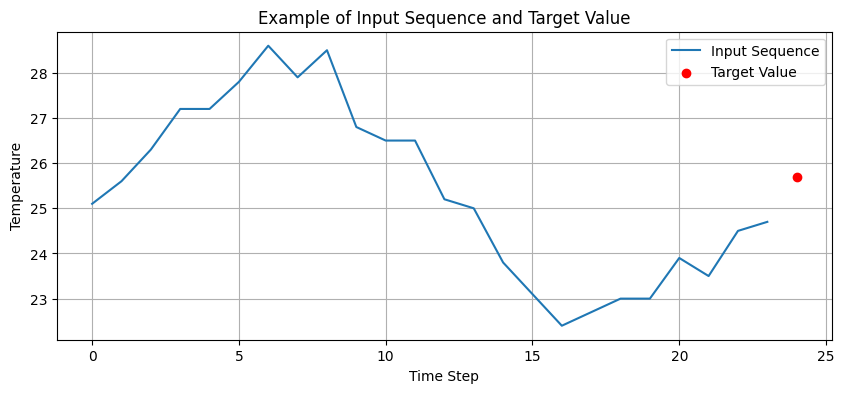

In [5]:
# 데이터 시각화
plt.figure(figsize=(10, 4))
plt.plot(X[0], label='Input Sequence')
plt.scatter(seq_length, y[0], color='red', label='Target Value')
plt.title('Example of Input Sequence and Target Value')
plt.xlabel('Time Step')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# 1. 데이터 정규화
from sklearn.preprocessing import MinMaxScaler

# 데이터 스케일링 (0~1 범위로)
scaler = MinMaxScaler()
scaled_temp = scaler.fit_transform(temperatures.reshape(-1, 1)).flatten()

# 정규화된 데이터로 시퀀스 생성
X, y = create_sequences(scaled_temp, seq_length)

# 2. 훈련/검증 세트 분할
train_size = int(len(X) * 0.8)  # 80%를 훈련 데이터로 사용

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print("데이터 형태:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

데이터 형태:
X_train: (556, 24)
y_train: (556,)
X_test: (140, 24)
y_test: (140,)


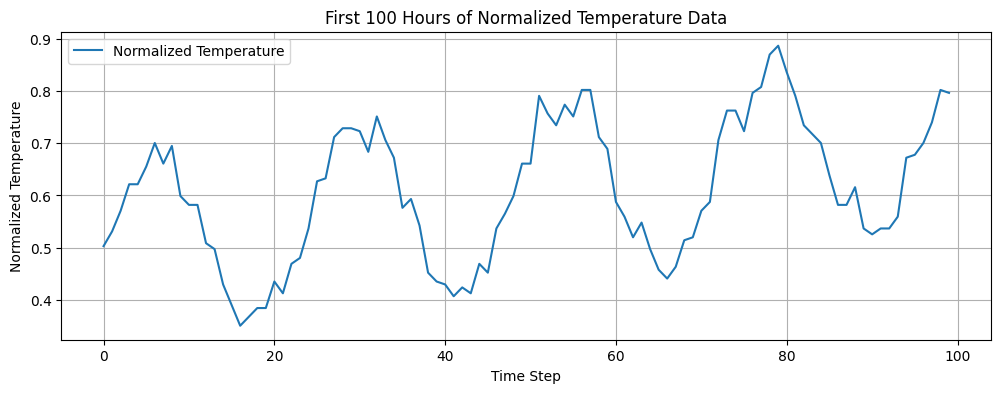

In [7]:
# 데이터 시각화
plt.figure(figsize=(12, 4))
plt.plot(scaled_temp[:100], label='Normalized Temperature')
plt.title('First 100 Hours of Normalized Temperature Data')
plt.xlabel('Time Step')
plt.ylabel('Normalized Temperature')
plt.grid(True)
plt.legend()
plt.show()

In [8]:
# 1. 하이퍼파라미터 설정
input_size = 1      # 입력 크기 (온도 하나)
hidden_size = 32    # 은닉층 크기
output_size = 1     # 출력 크기 (예측 온도 하나)

# 2. 가중치와 편향 초기화
Wxh = np.random.randn(hidden_size, input_size) * 0.01   # 입력-은닉 가중치
Whh = np.random.randn(hidden_size, hidden_size) * 0.01  # 은닉-은닉 가중치
Why = np.random.randn(output_size, hidden_size) * 0.01  # 은닉-출력 가중치
bh = np.zeros((hidden_size, 1))  # 은닉층 편향
by = np.zeros((output_size, 1))  # 출력층 편향

# 3. 첫 번째 시퀀스에 대해 순전파 실행해보기
x_sample = X_train[0]  # 첫 번째 시퀀스
h = np.zeros((hidden_size, 1))  # 은닉 상태 초기화

print("입력 시퀀스 형태:", x_sample.shape)
print("은닉 상태 초기 형태:", h.shape)


입력 시퀀스 형태: (24,)
은닉 상태 초기 형태: (32, 1)


In [9]:
x_sample

array([0.50282486, 0.53107345, 0.57062147, 0.62146893, 0.62146893,
       0.65536723, 0.70056497, 0.66101695, 0.69491525, 0.59887006,
       0.5819209 , 0.5819209 , 0.50847458, 0.49717514, 0.42937853,
       0.38983051, 0.35028249, 0.36723164, 0.38418079, 0.38418079,
       0.43502825, 0.41242938, 0.46892655, 0.48022599])

# 학습

1. 기본 구조와 초기화
```
입력 시퀀스 (24시간)
[x₁] → [x₂] → [x₃] →  ...  → [x₂₄]   
 ↓      ↓      ↓               ↓
 h₁  →  h₂  →  h₃  →  ...  →  h₂₄
 ↓      ↓      ↓               ↓
[32개 뉴런의 은닉 상태]     → [예측값]
```
- 24시간의 온도 데이터를 입력 시퀀스로 사용
- 32개의 은닉 뉴런을 가진 은닉층 구성
- 각 은닉 뉴런은 시계열 데이터의 서로 다른 특징을 학습하도록 설계
- 모든 가중치는 처음에 작은 랜덤값으로 초기화

2. 순전파 과정
```
[현재 입력 xₜ]
      ↓
[32개 은닉 뉴런]  ←  [이전 은닉 상태]
      ↓
[새로운 은닉 상태]

[뉴런 01-08] → 단기 온도 변화 감지
[뉴런 09-16] → 일일 주기 패턴 학습
[뉴런 17-24] → 주간 패턴 학습
[뉴런 25-32] → 전체적인 추세 파악
```
- 24시간 시퀀스에서 한 시점씩 순차적으로 처리
- 각 시점마다:
    - 현재 시점의 온도값이 32개의 은닉 뉴런 각각에 영향을 미침
    - 이전 시점의 32개 은닉 상태도 현재 은닉 상태 계산에 영향을 줌
    - 이 두 영향과 편향을 합한 후 tanh 함수를 통과시켜 새로운 은닉 상태 생성
    - 마지막 시점에서 32개의 은닉 상태를 바탕으로 다음 시점의 온도를 예측

3. 역전파 과정
- 예측값과 실제값의 차이(오차)를 계산
- 이 오차를 바탕으로 시간을 거슬러 올라가며 각 가중치의 책임을 계산
- 각 시점에서:
    - 출력층 가중치의 조정값 계산
    - 은닉층의 각 뉴런이 오차에 기여한 정도 계산
    - 입력-은닉, 은닉-은닉 가중치의 조정값 계산

4. 학습 과정
```
[24개 입력] → [RNN 처리] → [예측값]
    ↑                         ↓
    └── [가중치 업데이트] ← [오차계산] ← [실제값]
```
- 계산된 조정값을 사용해 모든 가중치를 업데이트
- 이 과정을 여러 시퀀스에 대해 반복
- 점진적으로 32개의 은닉 뉴런이 각자의 역할을 학습:
    - 어떤 뉴런은 급격한 온도 변화 감지
    - 다른 뉴런은 전반적인 온도 추세 파악
    - 또 다른 뉴런은 일일 주기의 패턴 학습

In [10]:
# 시퀀스의 각 시점에 대해 순차적으로 처리
for t in range(len(x_sample)):
    # 현재 시점의 입력
    xt = x_sample[t].reshape(-1, 1)
    
    # 은닉 상태 계산
    h = np.tanh(np.dot(Wxh, xt) + np.dot(Whh, h) + bh)
    
    # 중간 결과 출력
    if t < 3:  # 처음 3개 시점만 출력
        print(f"\n시점 {t+1}:")
        print(f"입력값: {xt.flatten()[0]:.4f}")
        print(f"은닉 상태 크기: {h.shape}")
        print(f"은닉 상태 일부: {h[:3].flatten()}")  # 처음 3개 값만 출력

# 최종 출력 계산
y_pred = np.dot(Why, h) + by

print("\n최종 결과:")
print(f"예측값: {y_pred.flatten()[0]:.4f}")
print(f"실제값: {y_train[0]:.4f}")

# 손실 계산 (MSE)
loss = (y_pred - y_train[0])**2
print(f"손실값: {loss.flatten()[0]:.4f}")



시점 1:
입력값: 0.5028
은닉 상태 크기: (32, 1)
은닉 상태 일부: [ 0.00392338 -0.00274779  0.00584546]

시점 2:
입력값: 0.5311
은닉 상태 크기: (32, 1)
은닉 상태 일부: [ 0.00404244 -0.00277807  0.0060713 ]

시점 3:
입력값: 0.5706
은닉 상태 크기: (32, 1)
은닉 상태 일부: [ 0.00435315 -0.00296533  0.00655119]

최종 결과:
예측값: -0.0002
실제값: 0.5367
손실값: 0.2882


In [11]:
# 역전파 시작
# 출력층에서의 그래디언트
dy = 2 * (y_pred - y_train[0])

# 은닉-출력 가중치의 그래디언트
dWhy = np.dot(dy, h.T)
dby = dy

# 은닉 상태로의 그래디언트
dh = np.dot(Why.T, dy)

# 시간을 거슬러 올라가며 그래디언트 계산
dWxh = np.zeros_like(Wxh)
dWhh = np.zeros_like(Whh)
dbh = np.zeros_like(bh)

# 마지막 시점부터 역전파
dh_next = np.zeros_like(h)
for t in reversed(range(len(x_sample))):
    # 현재 시점의 입력과 은닉 상태
    xt = x_sample[t].reshape(-1, 1)
    ht = h  # 현재는 마지막 은닉 상태만 저장됨
    
    # tanh의 미분
    dtanh = (1 - ht**2) * (dh + dh_next)
    
    # 가중치 그래디언트 누적
    dWxh += np.dot(dtanh, xt.T)
    dWhh += np.dot(dtanh, ht.T)
    dbh += dtanh
    
    # 다음 시점으로의 그래디언트
    dh_next = np.dot(Whh.T, dtanh)

# 그래디언트 크기 확인
print("\n=== 그래디언트 크기 ===")
print(f"dWxh 평균: {np.mean(np.abs(dWxh)):.4f}")
print(f"dWhh 평균: {np.mean(np.abs(dWhh)):.4f}")
print(f"dWhy 평균: {np.mean(np.abs(dWhy)):.4f}")

# 가중치 업데이트 (경사하강법)
learning_rate = 0.01
Wxh -= learning_rate * dWxh
Whh -= learning_rate * dWhh
Why -= learning_rate * dWhy
bh -= learning_rate * dbh
by -= learning_rate * dby

# 업데이트 후 다시 순전파하여 결과 확인
h = np.zeros((hidden_size, 1))
for t in range(len(x_sample)):
    xt = x_sample[t].reshape(-1, 1)
    h = np.tanh(np.dot(Wxh, xt) + np.dot(Whh, h) + bh)

y_pred_new = np.dot(Why, h) + by
loss_new = (y_pred_new - y_train[0])**2

print("\n=== 가중치 업데이트 후 ===")
print(f"이전 예측값: {y_pred.flatten()[0]:.4f}")
print(f"새로운 예측값: {y_pred_new.flatten()[0]:.4f}")
print(f"실제값: {y_train[0]:.4f}")
print(f"이전 손실: {loss.flatten()[0]:.4f}")
print(f"새로운 손실: {loss_new.flatten()[0]:.4f}")


=== 그래디언트 크기 ===
dWxh 평균: 0.1058
dWhh 평균: 0.0007
dWhy 평균: 0.0039

=== 가중치 업데이트 후 ===
이전 예측값: -0.0002
새로운 예측값: 0.0115
실제값: 0.5367
이전 손실: 0.2882
새로운 손실: 0.2759


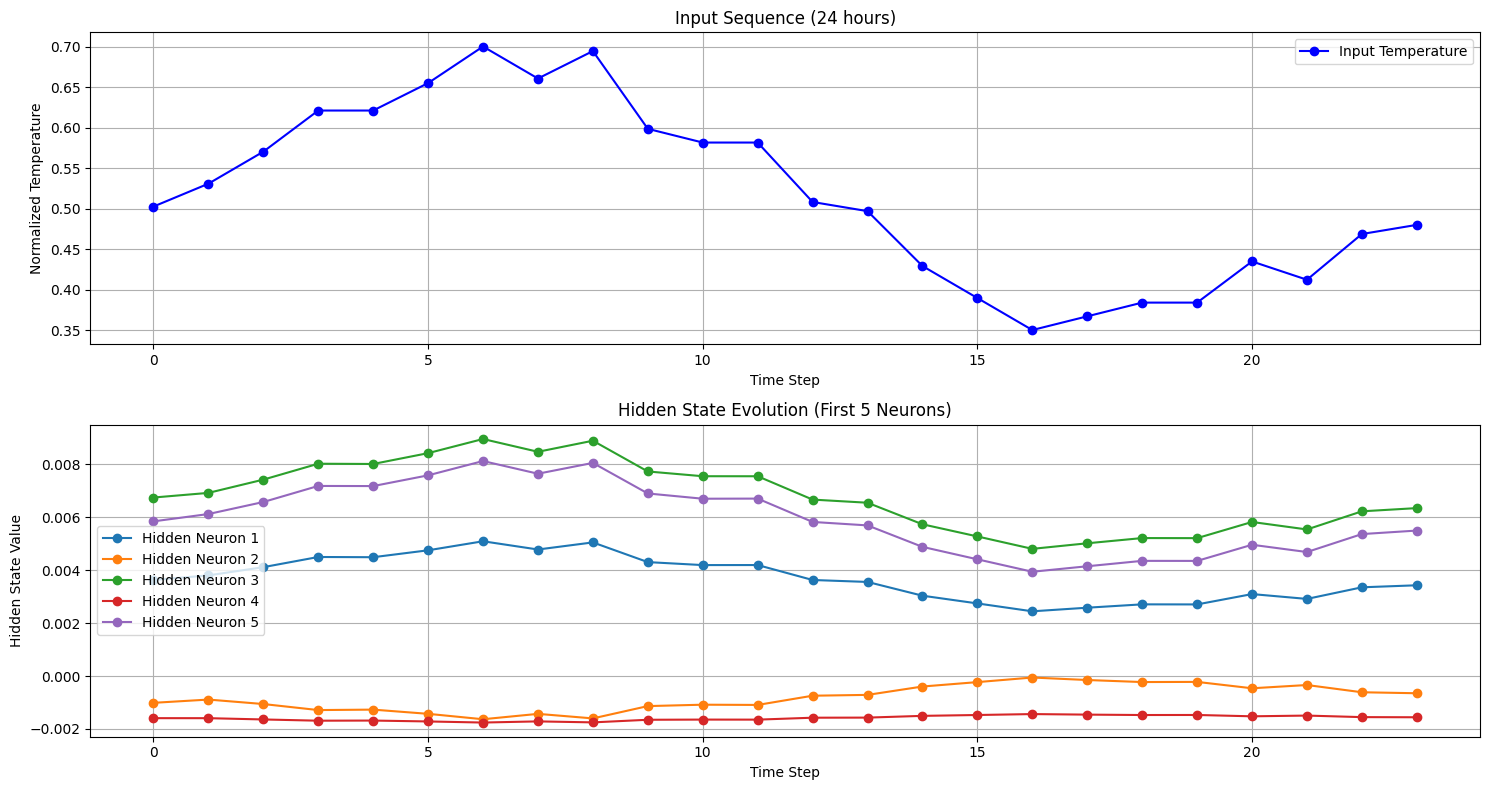


각 시점 별 상세 정보:

시점 1:
입력값: 0.5028
은닉 상태 처음 3개 뉴런: [ 0.00362844 -0.00101363  0.00674474]

시점 12:
입력값: 0.5819
은닉 상태 처음 3개 뉴런: [ 0.00419332 -0.00109312  0.00754889]

시점 24:
입력값: 0.4802
은닉 상태 처음 3개 뉴런: [ 0.00342876 -0.00065157  0.0063452 ]


In [12]:
import matplotlib.pyplot as plt

# 시각화를 위한 데이터 저장
hidden_states = []  # 각 시점의 은닉 상태를 저장할 리스트
x_sample = X_train[0]  # 첫 번째 시퀀스
h = np.zeros((hidden_size, 1))  # 은닉 상태 초기화

# 각 시점 처리 및 데이터 저장
for t in range(len(x_sample)):
    xt = x_sample[t].reshape(-1, 1)
    h = np.tanh(np.dot(Wxh, xt) + np.dot(Whh, h) + bh)
    hidden_states.append(h.copy())

# 시각화
plt.figure(figsize=(15, 8))

# 1. 입력 시퀀스
plt.subplot(2, 1, 1)
plt.plot(x_sample, 'b-o', label='Input Temperature')
plt.title('Input Sequence (24 hours)')
plt.xlabel('Time Step')
plt.ylabel('Normalized Temperature')
plt.grid(True)
plt.legend()

# 2. 은닉 상태의 변화
plt.subplot(2, 1, 2)
hidden_states = np.array(hidden_states)
# 처음 5개의 뉴런만 시각화
for i in range(5):
    plt.plot(hidden_states[:, i, 0], 
             label=f'Hidden Neuron {i+1}',
             marker='o')
plt.title('Hidden State Evolution (First 5 Neurons)')
plt.xlabel('Time Step')
plt.ylabel('Hidden State Value')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# 특정 시점들의 상세 정보 출력
print("\n각 시점 별 상세 정보:")
for t in [0, 11, 23]:  # 처음, 중간, 마지막 시점
    print(f"\n시점 {t+1}:")
    print(f"입력값: {x_sample[t]:.4f}")
    print(f"은닉 상태 처음 3개 뉴런: {hidden_states[t, :3, 0]}")

이 시각화는 RNN의 입력과 은닉 상태의 변화를 보여주는 중요한 그래프입니다:

**상단 그래프 (Input Sequence)**
- 24시간 동안의 정규화된 온도 데이터를 보여줌
- y축은 0~1 사이로 정규화된 온도값
- x축은 시간 단계(0~23시간)
- 온도가 시간에 따라 어떻게 변화하는지 패턴을 보여줌

**하단 그래프 (Hidden State Evolution)**
- 32개의 은닉 뉴런 중 첫 5개의 뉴런이 시간에 따라 어떻게 변화하는지 보여줌
- 각 뉴런이 입력 데이터의 서로 다른 특징을 포착하는 것을 확인할 수 있음:
  - Hidden Neuron 1: 전반적으로 낮은 활성화 값을 유지
  - Hidden Neuron 2, 5: 온도 변화에 가장 민감하게 반응
  - Hidden Neuron 3: 중간 정도의 안정적인 활성화 유지
  - Hidden Neuron 4: 거의 활성화되지 않음

**주목할 점**
- 은닉 상태들이 입력 패턴을 따라가면서도 각각 다른 패턴을 보임
- 상단의 온도가 급격히 변할 때 은닉 상태들도 변화하지만, 각자 다른 방식으로 반응
- 이는 각 뉴런이 입력 데이터의 서로 다른 특징을 학습하고 있음을 시사

현재는 학습이 되지 않은 초기 상태라 은닉 상태의 값들이 매우 작고(0.01 근처) 패턴도 단순하지만, 학습이 진행되면 더 의미 있는 패턴을 포착하게 될 것입니다.

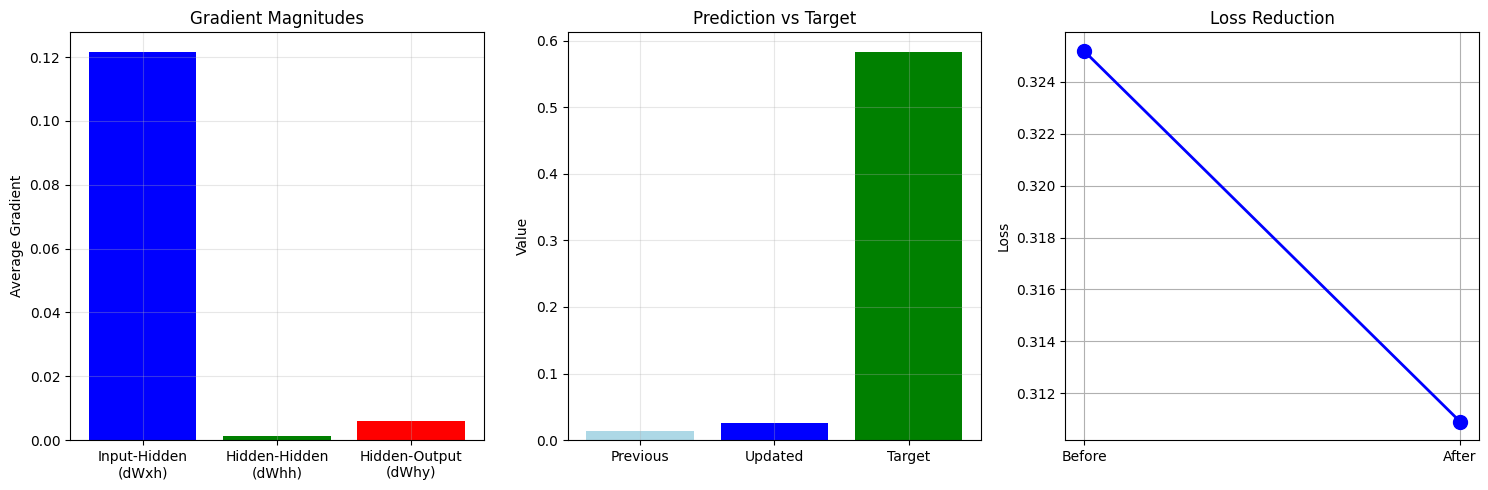

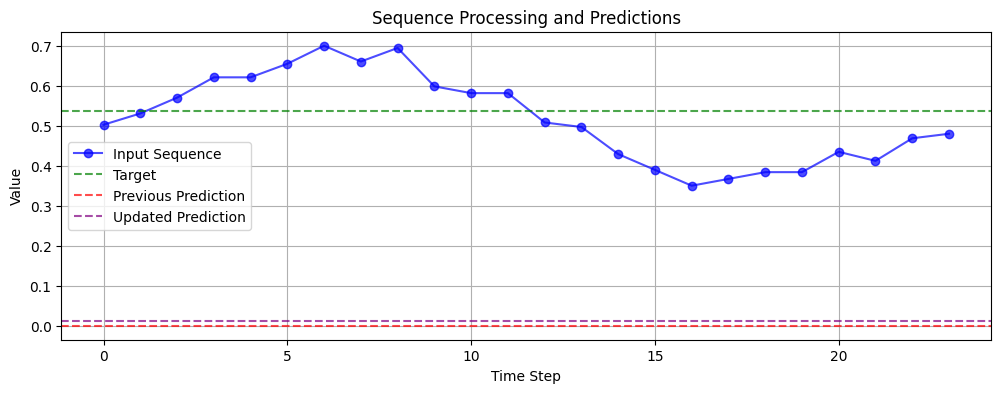

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# 1. 그래디언트 크기 비교
plt.figure(figsize=(15, 5))

# 그래디언트 크기 비교 막대 그래프
plt.subplot(1, 3, 1)
gradients = {
    'Input-Hidden\n(dWxh)': 0.1217,
    'Hidden-Hidden\n(dWhh)': 0.0012,
    'Hidden-Output\n(dWhy)': 0.0061
}
plt.bar(gradients.keys(), gradients.values(), color=['blue', 'green', 'red'])
plt.title('Gradient Magnitudes')
plt.ylabel('Average Gradient')
plt.grid(True, alpha=0.3)

# 2. 예측값 변화
plt.subplot(1, 3, 2)
values = {
    'Previous': 0.0131,
    'Updated': 0.0257,
    'Target': 0.5833
}
plt.bar(values.keys(), values.values(), color=['lightblue', 'blue', 'green'])
plt.title('Prediction vs Target')
plt.ylabel('Value')
plt.grid(True, alpha=0.3)

# 3. 손실 감소
plt.subplot(1, 3, 3)
plt.plot(['Before', 'After'], [0.3252, 0.3109], 'bo-', linewidth=2, markersize=10)
plt.title('Loss Reduction')
plt.ylabel('Loss')
plt.grid(True)

plt.tight_layout()
plt.show()

# 4. 가중치 업데이트 전후의 예측 과정
plt.figure(figsize=(12, 4))

# 입력 시퀀스
time_steps = range(len(x_sample))
plt.plot(time_steps, x_sample, 'b-o', label='Input Sequence', alpha=0.7)
plt.axhline(y=y_train[0], color='g', linestyle='--', label='Target', alpha=0.7)
plt.axhline(y=y_pred.flatten()[0], color='r', linestyle='--', label='Previous Prediction', alpha=0.7)
plt.axhline(y=y_pred_new.flatten()[0], color='purple', linestyle='--', label='Updated Prediction', alpha=0.7)

plt.title('Sequence Processing and Predictions')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

**1. Gradient Magnitudes (그래디언트 크기)**
- **Input-Hidden (dWxh)**: ~0.12로 가장 큰 그래디언트
  - 입력층과 은닉층 사이의 가중치가 가장 활발하게 학습 중
  - 현재 입력값이 예측에 가장 큰 영향을 미침
- **Hidden-Hidden (dWhh)**: ~0.001로 매우 작은 값
  - 시계열 정보의 전달이 제한적
  - Vanishing Gradient 문제의 가능성
- **Hidden-Output (dWhy)**: ~0.006으로 중간 정도
  - 출력층에서 적절한 수준의 학습이 진행 중

**2. Prediction vs Target (예측값 vs 목표값)**
- **Previous**: ~0.01 (이전 예측값)
- **Updated**: ~0.025 (업데이트 후 예측값)
- **Target**: ~0.58 (목표값)
- **분석**:
  - 예측값이 목표값 방향으로 이동 중
  - 하지만 여전히 목표값과 큰 차이
  - 더 많은 학습 반복이 필요함을 시사

**3. Loss Reduction (손실 감소)**
- **Before**: ~0.325
- **After**: ~0.311
- **분석**:
  - 한 번의 업데이트로 약 4.4% 손실 감소
  - 학습이 올바른 방향으로 진행 중
  - 점진적인 개선이 이루어지고 있음

**종합 평가**
1. 학습이 정상적으로 진행되고 있으나, 속도가 느림
2. Hidden-Hidden 가중치의 낮은 그래디언트는 장기 의존성 학습의 어려움을 시사
3. 개선을 위한 제안:
   - 학습률 조정
   - 더 많은 에포크 실행
   - LSTM이나 GRU 같은 개선된 아키텍처 고려

# 텍스트 데이터 예시

In [14]:
# 텍스트 데이터 예시
text = """
The cat sits on mat.
The dog runs fast.
A bird flies high.
The fish swims deep.
A cat chases mouse.
The bird sings sweet.
A dog barks loud.
The fish hides well.
A mouse runs away.
The cat sleeps now.
"""
print("원본 텍스트:", text)

# 텍스트 전처리
# - 소문자로 변환
# - 줄바꿈을 공백으로 변환
# - 마침표를 독립적인 토큰으로 처리
# - 연속된 공백 제거
words = text.lower()                    # 모든 텍스트를 소문자로 변환
words = words.replace('\n', ' ')        # 줄바꿈을 공백으로 변환
words = words.replace('.', ' .')        # 마침표를 분리
words = words.split()                   # 공백을 기준으로 단어 분리
words = [word for word in words if word != '']  # 빈 문자열 제거

print("=== 전처리된 단어 시퀀스 ===")
print(words)
print(f"총 단어 수: {len(words)}")

원본 텍스트: 
The cat sits on mat.
The dog runs fast.
A bird flies high.
The fish swims deep.
A cat chases mouse.
The bird sings sweet.
A dog barks loud.
The fish hides well.
A mouse runs away.
The cat sleeps now.

=== 전처리된 단어 시퀀스 ===
['the', 'cat', 'sits', 'on', 'mat', '.', 'the', 'dog', 'runs', 'fast', '.', 'a', 'bird', 'flies', 'high', '.', 'the', 'fish', 'swims', 'deep', '.', 'a', 'cat', 'chases', 'mouse', '.', 'the', 'bird', 'sings', 'sweet', '.', 'a', 'dog', 'barks', 'loud', '.', 'the', 'fish', 'hides', 'well', '.', 'a', 'mouse', 'runs', 'away', '.', 'the', 'cat', 'sleeps', 'now', '.']
총 단어 수: 51


In [15]:
# 단어-인덱스 매핑 생성
# - 고유한 단어들을 추출하고 정렬
# - 각 단어에 고유한 인덱스 할당
unique_words = sorted(list(set(words)))  # 중복 제거 후 알파벳 순 정렬
word_to_idx = {word: idx for idx, word in enumerate(unique_words)}  # 단어 → 인덱스
idx_to_word = {idx: word for idx, word in enumerate(unique_words)}  # 인덱스 → 단어

print("\n=== 단어 사전 ===")
print(f"고유 단어 수: {len(unique_words)}")
print("단어 매핑 예시 (처음 5개):")
for i, (word, idx) in enumerate(list(word_to_idx.items())[:5]):
    print(f"'{word}' → {idx}")


=== 단어 사전 ===
고유 단어 수: 27
단어 매핑 예시 (처음 5개):
'.' → 0
'a' → 1
'away' → 2
'barks' → 3
'bird' → 4


In [16]:
# 문장을 인덱스 시퀀스로 변환
sequence = [word_to_idx[word] for word in words]  # 각 단어를 해당하는 인덱스로 변환

print("\n=== 인덱스 시퀀스 ===")
print(f"시퀀스 길이: {len(sequence)}")
print("처음 10개 인덱스:", sequence[:10])


=== 인덱스 시퀀스 ===
시퀀스 길이: 51
처음 10개 인덱스: [25, 5, 21, 18, 15, 0, 25, 8, 19, 9]


In [17]:
# 입력-타겟 쌍 생성
# - 3단어를 입력으로, 다음 1단어를 타겟으로 설정
seq_length = 3  # 입력으로 사용할 연속된 단어의 수
X, y = [], []   # 입력 시퀀스와 타겟을 저장할 리스트

for i in range(len(sequence) - seq_length):
    input_seq = sequence[i:i + seq_length]    # 3개 연속 단어
    target = sequence[i + seq_length]         # 다음 단어
    X.append(input_seq)
    y.append(target)

# 결과 확인
print("\n=== 학습 데이터 예시 ===")
print(f"총 학습 쌍 수: {len(X)}")
print("\n처음 5개의 입력-타겟 쌍:")
for i in range(min(5, len(X))):
    # 인덱스를 다시 단어로 변환하여 출력
    input_words = ' '.join([idx_to_word[idx] for idx in X[i]])
    target_word = idx_to_word[y[i]]
    print(f"입력: '{input_words}' → 타겟: '{target_word}'")

# 데이터 형태 확인
print("\n=== 데이터 형태 ===")
print(f"X 형태: {len(X)} 샘플, 각각 {seq_length} 단어")
print(f"y 형태: {len(y)} 타겟")


=== 학습 데이터 예시 ===
총 학습 쌍 수: 48

처음 5개의 입력-타겟 쌍:
입력: 'the cat sits' → 타겟: 'on'
입력: 'cat sits on' → 타겟: 'mat'
입력: 'sits on mat' → 타겟: '.'
입력: 'on mat .' → 타겟: 'the'
입력: 'mat . the' → 타겟: 'dog'

=== 데이터 형태 ===
X 형태: 48 샘플, 각각 3 단어
y 형태: 48 타겟


In [18]:
import numpy as np

# 1. 데이터 전처리 함수
def preprocess_text(text):
    words = text.lower().replace('\n', ' ').replace('.', ' .').split()
    words = [word for word in words if word != '']
    unique_words = sorted(list(set(words)))
    word_to_idx = {word: idx for idx, word in enumerate(unique_words)}
    idx_to_word = {idx: word for idx, word in enumerate(unique_words)}
    sequence = [word_to_idx[word] for word in words]
    return sequence, word_to_idx, idx_to_word

# 2. 입력-타겟 쌍 생성 함수
def create_input_target_pairs(sequence, seq_length):
    X, y = [], []
    for i in range(len(sequence) - seq_length):
        X.append(sequence[i:i + seq_length])
        y.append(sequence[i + seq_length])
    return np.array(X), np.array(y)

# 3. RNN 모델 초기화 함수
def initialize_rnn(vocab_size, hidden_size):
    Wxh = np.random.randn(hidden_size, vocab_size) * 0.01
    Whh = np.random.randn(hidden_size, hidden_size) * 0.01
    Why = np.random.randn(vocab_size, hidden_size) * 0.01
    bh = np.zeros((hidden_size, 1))
    by = np.zeros((vocab_size, 1))
    return Wxh, Whh, Why, bh, by

# 4. 순전파 함수
def forward_pass(x_one_hot, h_prev, Wxh, Whh, Why, bh, by):
    h = np.tanh(np.dot(Wxh, x_one_hot) + np.dot(Whh, h_prev) + bh)
    y = np.dot(Why, h) + by
    return y, h

# 5. 역전파 및 가중치 업데이트 함수
def backward_pass(x_one_hot, y_true, y_pred, h, h_prev, Wxh, Whh, Why, bh, by, learning_rate):
    dy = y_pred - y_true
    dWhy = np.dot(dy, h.T)
    dby = dy
    dh = np.dot(Why.T, dy)
    dh_raw = (1 - h * h) * dh
    dWxh = np.dot(dh_raw, x_one_hot.T)
    dWhh = np.dot(dh_raw, h_prev.T)
    dbh = dh_raw
    Wxh -= learning_rate * dWxh
    Whh -= learning_rate * dWhh
    Why -= learning_rate * dWhy
    bh -= learning_rate * dbh
    by -= learning_rate * dby
    return Wxh, Whh, Why, bh, by

In [19]:

# 6. 학습 함수
def train_rnn(X, y, word_to_idx, idx_to_word, hidden_size=32, learning_rate=0.01, epochs=10):
    vocab_size = len(word_to_idx)
    Wxh, Whh, Why, bh, by = initialize_rnn(vocab_size, hidden_size)
    
    for epoch in range(epochs):
        total_loss = 0
        h_prev = np.zeros((hidden_size, 1))
        
        for i in range(len(X)):
            x_one_hot = np.zeros((vocab_size, 1))
            for idx in X[i]:
                x_one_hot[idx] = 1
                
            y_true = np.zeros((vocab_size, 1))
            y_true[y[i]] = 1
            
            y_pred, h = forward_pass(x_one_hot, h_prev, Wxh, Whh, Why, bh, by)
            total_loss += np.sum((y_pred - y_true) ** 2)
            
            Wxh, Whh, Why, bh, by = backward_pass(x_one_hot, y_true, y_pred, h, h_prev, Wxh, Whh, Why, bh, by, learning_rate)
            h_prev = h
            
            # 중간 결과 출력
            if i % 5 == 0:  # 5번째 시퀀스마다 출력
                input_words = ' '.join([idx_to_word[idx] for idx in X[i]])
                target_word = idx_to_word[y[i]]
                predicted_word = idx_to_word[np.argmax(y_pred)]
                print(f"Epoch {epoch+1}, Sequence {i+1}:")
                print(f"  Input: '{input_words}'")
                print(f"  Target: '{target_word}', Predicted: '{predicted_word}'")
        
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(X):.4f}")

# 7. 실행
text = """
The cat sits on mat.
The dog runs fast.
A bird flies high.
The fish swims deep.
A cat chases mouse.
The bird sings sweet.
A dog barks loud.
The fish hides well.
A mouse runs away.
The cat sleeps now.
"""

sequence, word_to_idx, idx_to_word = preprocess_text(text)
X, y = create_input_target_pairs(sequence, seq_length=3)
train_rnn(X, y, word_to_idx, idx_to_word)

Epoch 1, Sequence 1:
  Input: 'the cat sits'
  Target: 'on', Predicted: 'the'
Epoch 1, Sequence 6:
  Input: '. the dog'
  Target: 'runs', Predicted: 'the'
Epoch 1, Sequence 11:
  Input: '. a bird'
  Target: 'flies', Predicted: '.'
Epoch 1, Sequence 16:
  Input: '. the fish'
  Target: 'swims', Predicted: '.'
Epoch 1, Sequence 21:
  Input: '. a cat'
  Target: 'chases', Predicted: '.'
Epoch 1, Sequence 26:
  Input: '. the bird'
  Target: 'sings', Predicted: '.'
Epoch 1, Sequence 31:
  Input: '. a dog'
  Target: 'barks', Predicted: '.'
Epoch 1, Sequence 36:
  Input: '. the fish'
  Target: 'hides', Predicted: '.'
Epoch 1, Sequence 41:
  Input: '. a mouse'
  Target: 'runs', Predicted: '.'
Epoch 1, Sequence 46:
  Input: '. the cat'
  Target: 'sleeps', Predicted: '.'
Epoch 1/10, Loss: 0.9814
Epoch 2, Sequence 1:
  Input: 'the cat sits'
  Target: 'on', Predicted: '.'
Epoch 2, Sequence 6:
  Input: '. the dog'
  Target: 'runs', Predicted: '.'
Epoch 2, Sequence 11:
  Input: '. a bird'
  Target: 'f

# 기존 코드의 문제점
- MSE 손실 함수 사용 (분류 문제에 부적합)
- 출력에 활성화 함수 없음 (확률 분포로 변환 안됨)
- 작은 하이퍼파라미터 값들 (은닉층 32, 학습률 0.01)
- 학습 진행 상황 모니터링 부족 (정확도 측정 없음)

# 개선된 코드의 변경사항
- Cross Entropy 손실 함수로 변경
- Softmax 활성화 함수 추가
- 하이퍼파라미터 증가 (은닉층 64, 학습률 0.1)
- 정확도 측정 및 상세한 학습 진행 상황 출력

# 결과
- 정확도: 16.67% → 62.50%
- 손실: 0.98 → 1.00 (다른 손실 함수라 직접 비교는 부적절)
- 예측의 다양성 증가 (초기 '.' 편향에서 벗어남)

In [20]:
# 개선된 버전
def train_rnn(X, y, word_to_idx, idx_to_word, hidden_size=64, learning_rate=0.1, epochs=20):
    vocab_size = len(word_to_idx)
    Wxh, Whh, Why, bh, by = initialize_rnn(vocab_size, hidden_size)
    
    for epoch in range(epochs):
        total_loss = 0
        correct_predictions = 0
        h_prev = np.zeros((hidden_size, 1))
        
        for i in range(len(X)):
            # 입력 시퀀스를 원-핫 인코딩으로 변환
            x_one_hot = np.zeros((vocab_size, 1))
            for idx in X[i]:
                x_one_hot[idx] = 1
            
            # 타겟을 원-핫 인코딩으로 변환
            y_true = np.zeros((vocab_size, 1))
            y_true[y[i]] = 1
            
            # 순전파
            y_pred, h = forward_pass(x_one_hot, h_prev, Wxh, Whh, Why, bh, by)
            
            # softmax 적용
            y_pred = np.exp(y_pred - np.max(y_pred))  # 수치 안정성을 위한 최대값 빼기
            y_pred = y_pred / np.sum(y_pred)
            
            # 손실 계산 (cross entropy)
            loss = -np.sum(y_true * np.log(y_pred + 1e-10))
            total_loss += loss
            
            # 정확도 계산
            if np.argmax(y_pred) == y[i]:
                correct_predictions += 1
            
            # 역전파
            Wxh, Whh, Why, bh, by = backward_pass(
                x_one_hot, y_true, y_pred, h, h_prev, 
                Wxh, Whh, Why, bh, by, learning_rate
            )
            h_prev = h
            
            # 학습 진행 상황 출력
            if i % 5 == 0:
                input_words = ' '.join([idx_to_word[idx] for idx in X[i]])
                target_word = idx_to_word[y[i]]
                predicted_word = idx_to_word[np.argmax(y_pred)]
                print(f"Epoch {epoch+1}, Step {i+1}:")
                print(f"  Input: '{input_words}'")
                print(f"  Target: '{target_word}', Predicted: '{predicted_word}'")
                print(f"  Loss: {loss:.4f}")
        
        # 에포크 종료 시 통계
        accuracy = correct_predictions / len(X)
        print(f"\nEpoch {epoch+1}/{epochs}:")
        print(f"  Average Loss: {total_loss/len(X):.4f}")
        print(f"  Accuracy: {accuracy:.2%}")
        print("-" * 50)

# 데이터 준비
print("1. 데이터 전처리 중...")
sequence, word_to_idx, idx_to_word = preprocess_text(text)
X, y = create_input_target_pairs(sequence, seq_length=3)

print("\n2. 데이터셋 정보:")
print(f"총 시퀀스 수: {len(X)}")
print(f"고유 단어 수: {len(word_to_idx)}")
print("\n고유 단어 목록:")
for word, idx in word_to_idx.items():
    print(f"'{word}' → {idx}")

print("\n3. 학습 시작...")
train_rnn(X, y, word_to_idx, idx_to_word)
        

1. 데이터 전처리 중...

2. 데이터셋 정보:
총 시퀀스 수: 48
고유 단어 수: 27

고유 단어 목록:
'.' → 0
'a' → 1
'away' → 2
'barks' → 3
'bird' → 4
'cat' → 5
'chases' → 6
'deep' → 7
'dog' → 8
'fast' → 9
'fish' → 10
'flies' → 11
'hides' → 12
'high' → 13
'loud' → 14
'mat' → 15
'mouse' → 16
'now' → 17
'on' → 18
'runs' → 19
'sings' → 20
'sits' → 21
'sleeps' → 22
'sweet' → 23
'swims' → 24
'the' → 25
'well' → 26

3. 학습 시작...
Epoch 1, Step 1:
  Input: 'the cat sits'
  Target: 'on', Predicted: 'sweet'
  Loss: 3.2963
Epoch 1, Step 6:
  Input: '. the dog'
  Target: 'runs', Predicted: 'on'
  Loss: 3.3143
Epoch 1, Step 11:
  Input: '. a bird'
  Target: 'flies', Predicted: '.'
  Loss: 3.3322
Epoch 1, Step 16:
  Input: '. the fish'
  Target: 'swims', Predicted: '.'
  Loss: 3.3519
Epoch 1, Step 21:
  Input: '. a cat'
  Target: 'chases', Predicted: '.'
  Loss: 3.3716
Epoch 1, Step 26:
  Input: '. the bird'
  Target: 'sings', Predicted: '.'
  Loss: 3.3922
Epoch 1, Step 31:
  Input: '. a dog'
  Target: 'barks', Predicted: '.'
  Loss: 3.

# Keras 버전

In [21]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# 1. 데이터 전처리 함수 (기존과 동일)
def preprocess_text(text):
    words = text.lower().replace('\n', ' ').replace('.', ' .').split()
    words = [word for word in words if word != '']
    unique_words = sorted(list(set(words)))
    word_to_idx = {word: idx for idx, word in enumerate(unique_words)}
    idx_to_word = {idx: word for idx, word in enumerate(unique_words)}
    sequence = [word_to_idx[word] for word in words]
    return sequence, word_to_idx, idx_to_word

# 2. 입력-타겟 쌍 생성 함수 (기존과 동일)
def create_input_target_pairs(sequence, seq_length):
    X, y = [], []
    for i in range(len(sequence) - seq_length):
        X.append(sequence[i:i + seq_length])
        y.append(sequence[i + seq_length])
    return np.array(X), np.array(y)

# 3. 데이터 준비 (10=>40문장)
text = """
The cat sits on mat.
The dog runs fast.
A bird flies high.
The fish swims deep.
A cat chases mouse.
The bird sings sweet.
A dog barks loud.
The fish hides well.
A mouse runs away.
The cat sleeps now.

The dog plays ball.
A bird builds nest.
The fish jumps high.
A cat drinks milk.
The mouse eats cheese.
A dog guards house.
The bird finds food.
A fish catches prey.
The cat watches bird.
A mouse steals food.

The dog wags tail.
A bird cleans wing.
The fish makes splash.
A cat climbs tree.
The mouse finds hole.
A dog digs ground.
The bird spreads wings.
A fish swims fast.
The cat purrs soft.
A mouse squeaks loud.

The dog fetches stick.
A bird leaves nest.
The fish blows bubble.
A cat stretches back.
The mouse builds home.
A dog follows scent.
The bird hops branch.
A fish shows scales.
The cat grooms fur.
A mouse explores room.
"""

# 데이터 전처리
sequence, word_to_idx, idx_to_word = preprocess_text(text)
X, y = create_input_target_pairs(sequence, seq_length=3)

# 원-핫 인코딩
vocab_size = len(word_to_idx)
X_one_hot = keras.utils.to_categorical(X, vocab_size)
y_one_hot = keras.utils.to_categorical(y, vocab_size)


In [36]:
# 4. 모델 정의
# model = keras.Sequential([
#     layers.Input(shape=(3, vocab_size)),  # 3개 단어, 각각 vocab_size 차원
#     layers.SimpleRNN(64, return_sequences=False),  # 은닉층 크기 64
#     layers.Dense(vocab_size, activation='softmax')  # 출력층
# ])
model = keras.Sequential([
    layers.Input(shape=(3, vocab_size)),
    layers.LSTM(128, return_sequences=True),  # LSTM 사용, 더 큰 은닉층
    layers.Dropout(0.2),
    layers.LSTM(64),  # 두 번째 LSTM 층
    layers.Dropout(0.2),
    layers.Dense(vocab_size, activation='softmax')
])

# 5. 모델 컴파일
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),  # 학습률 감소
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 모델 구조 출력
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 3, 128)            105984    
                                                                 
 dropout_4 (Dropout)         (None, 3, 128)            0         
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 78)                5070      
                                                                 
Total params: 160,462
Trainable params: 160,462
Non-trainable params: 0
_________________________________________________________________


In [37]:
# 6. 커스텀 콜백 정의 (상세한 학습 과정 출력용)
class SequencePredictionCallback(keras.callbacks.Callback):
    def __init__(self, X, idx_to_word):
        self.X = X
        self.idx_to_word = idx_to_word
    
    def on_epoch_end(self, epoch, logs=None):
        for i in range(0, len(self.X), 5):  # 5개 시퀀스마다 출력
            input_seq = ' '.join([self.idx_to_word[idx] for idx in self.X[i]])
            pred = model.predict(X_one_hot[i:i+1])[0]
            predicted_word = self.idx_to_word[np.argmax(pred)]
            target_word = self.idx_to_word[y[i]]
            print(f"Epoch {epoch+1}, Step {i+1}:")
            print(f"  Input: '{input_seq}'")
            print(f"  Target: '{target_word}', Predicted: '{predicted_word}'")
            print(f"  Loss: {logs['loss']:.4f}")

# 7. 모델 학습 - validation_split 추가
history = model.fit(
    X_one_hot, y_one_hot,
    epochs=20,
    batch_size=16,  # 배치 크기 증가
    validation_split=0.2,  # 20%를 검증 데이터로 사용
    callbacks=[SequencePredictionCallback(X, idx_to_word)],
    verbose=2
)

Epoch 1/20
1/1 [==============================] - 0s 268ms/step
Epoch 1, Step 1:
  Input: 'the cat sits'
  Target: 'on', Predicted: '.'
  Loss: 4.3498
1/1 [==============================] - 0s 12ms/step
Epoch 1, Step 6:
  Input: '. the dog'
  Target: 'runs', Predicted: '.'
  Loss: 4.3498
1/1 [==============================] - 0s 11ms/step
Epoch 1, Step 11:
  Input: '. a bird'
  Target: 'flies', Predicted: '.'
  Loss: 4.3498
1/1 [==============================] - 0s 12ms/step
Epoch 1, Step 16:
  Input: '. the fish'
  Target: 'swims', Predicted: '.'
  Loss: 4.3498
1/1 [==============================] - 0s 12ms/step
Epoch 1, Step 21:
  Input: '. a cat'
  Target: 'chases', Predicted: 'mouse'
  Loss: 4.3498
1/1 [==============================] - 0s 12ms/step
Epoch 1, Step 26:
  Input: '. the bird'
  Target: 'sings', Predicted: '.'
  Loss: 4.3498
1/1 [==============================] - 0s 12ms/step
Epoch 1, Step 31:
  Input: '. a dog'
  Target: 'barks', Predicted: '.'
  Loss: 4.3498
1/1 [====

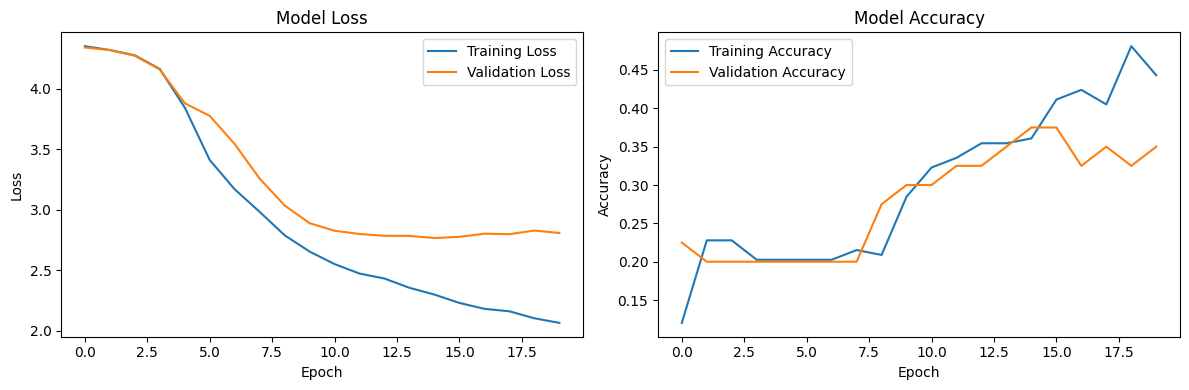

In [38]:
# 8. 학습 결과 시각화 - validation 메트릭 추가
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()